# Notebook - long with show cases

In [2]:
# required libraries
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import math
import scipy

In [3]:
# definitions of fundamental constant used in calculations
# physics constants
hbar = scipy.constants.hbar
h = scipy.constants.h
pi = math.pi
m_0 = scipy.constants.physical_constants["atomic unit of mass"][0]
_1eV  = scipy.constants.physical_constants["electron volt"][0]

m_eff = 0.067 # [* m_0] GaAs

# Deffinition of the computational box
site_size = 500 # [Angstrom]

# Number of atoms per site in material
site_elements = 30 # elements
n = site_elements

ax = site_size / (site_elements - 1) # [Angstrom]
a = ax # distance between elements 

t = 1 / (2 * m_eff * ax ** 2) * (hbar ** 2) / (m_0 * 10e-20 * _1eV)   # [eV]

## 1D dispersion
data:
- ek_kp_1D
- ek_cos_1D


In [4]:
kx = np.linspace(-pi/ax,pi/ax,n)
# kp dispersion
E0 = 0
f = lambda kx: (hbar ** 2) * (kx ** 2) / (2 * m_eff * m_0 * _1eV * 10e-20) + E0
ek_kp_1D = np.array(list(map(f, kx))) # in eV

# cos dispersion
dEs = 0
# t = 1 / (2 * m_eff * ax ** 2) * (hbar ** 2) / (m_0 * 10e-20 * _1eV)   # [eV]
ek_cos_1D = dEs - 2 * t * np.cos(kx * ax) # in eV

# scale the ek_cos_1D so it will start at 0
f = lambda x: x - delta
delta = np.amin(ek_cos_1D)
ek_cos_1D = np.array(list(map(f, ek_cos_1D)))

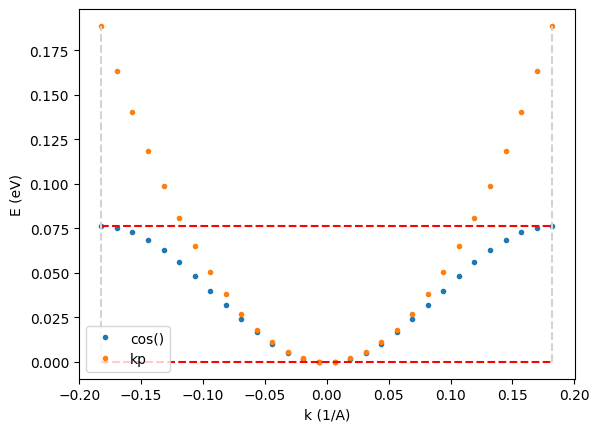

In [5]:
# Ploting dispersion 1D
plt.plot(kx,ek_cos_1D,'.', label="cos()")
plt.plot(kx,ek_kp_1D,'.', label="kp")
plt.xlabel("k (1/A)")
plt.ylabel("E (eV)")
plt.hlines(4*t, -pi/ax, pi/ax, colors="red", linestyles="--")
plt.hlines(0, -pi/ax, pi/ax, colors="red", linestyles="--")
plt.vlines(-pi/ax, 0, np.amax(ek_kp_1D), colors="lightgray", linestyles="--")
plt.vlines(pi/ax, 0, np.amax(ek_kp_1D), colors="lightgray", linestyles="--")
plt.legend()
plt.show()

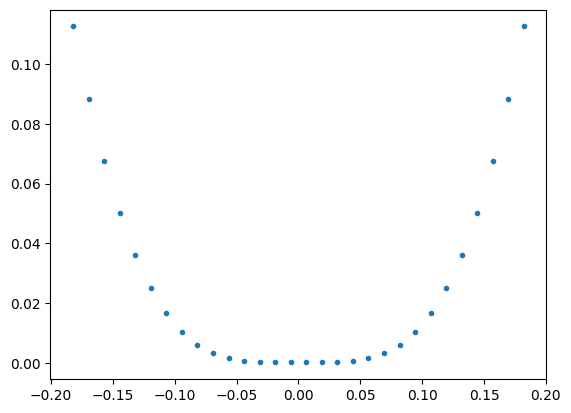

In [6]:
# Plot difference
plt.plot(kx,ek_kp_1D-ek_cos_1D,'.')
plt.show()

## 2D dispersion
data:
- ek_kp
- ek_cos

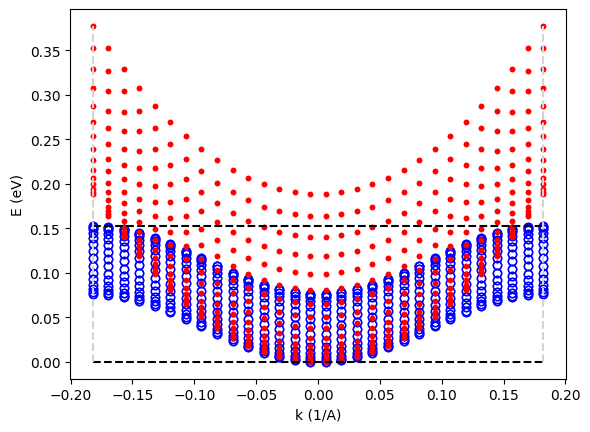

In [7]:
'''
n = 50
a = 10
t = 1 / (2 * m_eff * a ** 2) * (hbar ** 2) / (m_0 * 10e-20 * _1eV)   # [eV]
'''
kx = np.linspace(-pi/a,pi/a,n)
ky = np.linspace(-pi/a,pi/a,n)
kxx, kyy = np.meshgrid(kx, ky)
dEs = 0

# kp
f = lambda kx, ky: (hbar ** 2) * (kx ** 2 + ky ** 2) / (2 * m_eff * m_0 * _1eV * 10e-20) + E0
ek_kp = np.array(list(map(f, kxx, kyy)))


# cos
ek_cos = dEs - 2 * t * (np.cos(kxx * a) + np.cos(kyy * a))

# scale the ek_cos so it will start at 0
f = lambda x: x - delta
delta = np.amin(ek_cos)
ek_cos = np.array(list(map(f, ek_cos)))

# plot dispersion
for i in range(n):
    plt.plot(kx,ek_cos[i],'o', mfc = 'none', mec = 'blue', color="blue", label="cos()")
for i in range(n):    
    plt.plot(kx,ek_kp[i],'.', color="red", label="kp")
plt.xlabel("k (1/A)")
plt.ylabel("E (eV)")
plt.hlines(8*t, -pi/a, pi/a, colors="black", linestyles="--")
plt.hlines(0, -pi/a, pi/a, colors="black", linestyles="--")
plt.vlines(-pi/a, 0, np.amax(ek_kp), colors="lightgray", linestyles="--")
plt.vlines(pi/a, 0, np.amax(ek_kp), colors="lightgray", linestyles="--")
plt.show()

sieciowa regularyzacja - tw. neomi regul. ferm ferm-dirac

## Build material

In [7]:
# material specific constant
'''
a = 1 #[nm]
r_0 = 10 #[nm]
V_max = 0.3 #[eV]

m_eff = 0.067 # [* m_0]
E0 = 0
t = 1 / (2 * m_eff * a ** 2) * (hbar ** 2) / (m_0 * 10e-20 * _1eV)   # [eV]'''

'\na = 1 #[nm]\nr_0 = 10 #[nm]\nV_max = 0.3 #[eV]\n\nm_eff = 0.067 # [* m_0]\nE0 = 0\nt = 1 / (2 * m_eff * a ** 2) * (hbar ** 2) / (m_0 * 10e-20 * _1eV)   # [eV]'

In [8]:
'''def initialize_layout(layout_size_x, layout_size_y):
    Layout = np.zeros((layout_size_y, layout_size_x), dtype=int)
    k = 1
    for i in range(layout_size_x):
        for j in range(layout_size_y):
            Layout[j][i] = k
            k += 1
    return Layout
    
def plot_layout(Layout):
    x = Layout.shape[1]
    y = Layout.shape[0]
    X = np.arange(1, x+1, 1, dtype=int)
    fig, axs = plt.subplots(1, 1)

    for i in range(y):
        Y=[]
        for j in range(x):
            Y.append(i+1)
        axs.scatter(X, Y, c='blue', linewidths=10)
    axs.set_aspect('equal', 'box')
    formatter = mticker.ScalarFormatter()
    axs.xaxis.set_major_formatter(formatter)
    axs.xaxis.set_major_locator(mticker.FixedLocator([]))
    axs.yaxis.set_major_locator(mticker.FixedLocator([]))
    plt.show()    
    '''

def initialize_layout(layout_size_x, layout_size_y):
    Layout = {"2Dneighbours": np.zeros((layout_size_y, layout_size_x), dtype=int),
              "realLocation": [[[]]]}
    k = 1
    for i in range(layout_size_x):
        for j in range(layout_size_y):
            Layout["2Dneighbours"][j][i] = k
            Layout["realLocation"].append([k,[a*i,a*j]])
            k += 1
    Layout["realLocation"] = Layout["realLocation"][1:]
    '''Layout = np.zeros((layout_size_y, layout_size_x), dtype=int)
    k = 1
    for i in range(layout_size_x):
        for j in range(layout_size_y):
            Layout["2Dneighbours"][j][i] = k
            k += 1
    return Layout'''

    return Layout

'''def plot_layout(Layout):
    num_elem = len(Layout)
    #x = Layout.shape[1]
    #y = Layout.shape[0]
    x , y = int(np.sqrt(num_elem)), int(np.sqrt(num_elem))
    X = np.arange(1, x+1, 1, dtype=int)
    fig, axs = plt.subplots(1, 1)
    
    for elem in Layout:
        axs.scatter(elem[1][0], elem[1][1], c='blue', linewidths=10)

    axs.set_aspect('equal', 'box')
    #formatter = mticker.ScalarFormatter()
    #axs.xaxis.set_major_formatter(formatter)
    #axs.xaxis.set_major_locator(mticker.FixedLocator([]))
    #axs.yaxis.set_major_locator(mticker.FixedLocator([]))
    plt.show()'''

def plot_layout(Layout):
    for elem in Layout["realLocation"]:
        plt.scatter(elem[1][0], elem[1][1], c='blue', linewidths=1)

    plt.gca().set_aspect('equal', 'box')
    plt.show()    

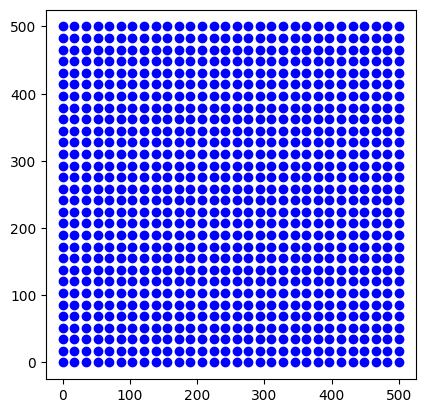

In [9]:
# show layout showcase
Layout = initialize_layout(site_elements, site_elements)
#print(Layout)
plot_layout(Layout)

In [10]:
def initialize_hamiltonian(Layout, t, PBC:bool):
    # elements = Layout.shape[0]*Layout.shape[1]
    layout_size_x = Layout["2Dneighbours"].shape[0]
    layout_size_y = Layout["2Dneighbours"].shape[1]
    elements = len(Layout["realLocation"])
    site_elements = layout_size_x # math.floor(math.sqrt(elements))
    Hamiltonian = np.zeros((elements,elements))
    
    for i in range(layout_size_x):
        for j in range(layout_size_y):
            elem = Layout["2Dneighbours"][i,j] - 1

            next_x, prev_x, next_y, prev_y = neighbours(Layout["2Dneighbours"], i, j, PBC)

            if next_x in range(elements):
                Hamiltonian[next_x,elem] = -t
                Hamiltonian[elem,next_x] = -t

            if prev_x in range(elements):    
                Hamiltonian[prev_x,elem] = -t
                Hamiltonian[elem,prev_x] = -t

            if next_y in range(elements):
                Hamiltonian[next_y,elem] = -t
                Hamiltonian[elem,next_y] = -t
            
            if prev_y in range(elements):
                Hamiltonian[prev_y,elem] = -t
                Hamiltonian[elem,prev_y] = -t

    for i in range(elements):

       Hamiltonian[i][i] = 4*t
       
    return Hamiltonian

def neighbours(Layout, i, j, PBC:bool):
    layout_size_x = Layout.shape[0]
    layout_size_y = Layout.shape[1]
    if PBC:
        #print("PBC True")
        if j in range(1,layout_size_y-1):
            next_y = j + 1
            prev_y = j - 1
        elif j == 0:
            next_y = j + 1
            prev_y = layout_size_y-1
        else:
            next_y = 0
            prev_y = j - 1

        if i in range(1,layout_size_x-1):
            next_x = i + 1
            prev_x = i - 1
        elif i == 0:
            next_x = i + 1
            prev_x = layout_size_x-1
        else:
            next_x = 0
            prev_x = i - 1
        
        return Layout[i,prev_y]-1, Layout[i,next_y]-1, Layout[prev_x,j]-1, Layout[next_x,j]-1
    else:
        # bez torusa E min != 0 !!!
        next_y = j + 1
        prev_y = j - 1
        next_x = i + 1
        prev_x = i - 1

        if prev_y in range(0,layout_size_y):
            prev_y_elem = Layout[i,prev_y]-1 
        else:
            prev_y_elem = -1
        if next_y in range(0,layout_size_y):
            next_y_elem = Layout[i,next_y]-1
        else:
            next_y_elem = -1
        if prev_x in range(0,layout_size_x):
            prev_x_elem =  Layout[prev_x,j]-1
        else:
            prev_x_elem = -1
        if next_x in range(0,layout_size_x):
            next_x_elem =  Layout[next_x,j]-1
        else:
            next_x_elem = -1

        return prev_y_elem, next_y_elem, prev_x_elem, next_x_elem

     

def diagonalize_hamiltonian(Hamiltonian):
    E,psiT = np.linalg.eigh(Hamiltonian) # This computes the eigen values and eigenvectors
    psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]
    #plt.plot(E, 'o')
    #plt.show()
    return E

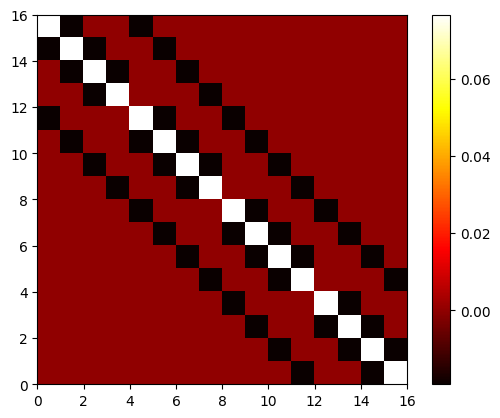

In [11]:
# show hamiltonian
# odbicie osi y - zwróć uwagę żeby było dobrze
Layout = initialize_layout(4, 4)
Hamiltonian = initialize_hamiltonian(Layout, t, False)
#Hamiltonian = np.flip(Hamiltonian,axis=1)
ran = math.floor(math.sqrt(Hamiltonian.size))
plt.imshow(Hamiltonian, cmap='hot', extent=[0, ran, 0, ran])
plt.colorbar() 
plt.show()


In [12]:
Hamiltonian[0][15]

0.0

### Solving this Hamiltonian

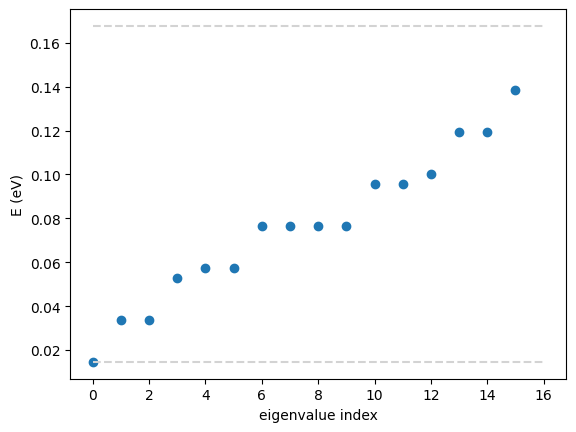

In [13]:
#N = 60
#Layout = initialize_layout(N, N)
#print(Layout)
#plot_layout(Layout)
#Hamiltonian = initialize_hamiltonian(Layout, t)
#Hamiltonian = np.flip(Hamiltonian,axis=1)
#print(Hamiltonian)
diagonalizated_hamiltonain = diagonalize_hamiltonian(Hamiltonian)
plt.plot(diagonalizated_hamiltonain, 'o')
bottom = np.amin(diagonalizated_hamiltonain)
plt.hlines(8*t+bottom, 0, len(diagonalizated_hamiltonain), colors="lightgray", linestyles="--")
plt.hlines(bottom, 0, len(diagonalizated_hamiltonain), colors="lightgray", linestyles="--")
plt.xlabel("eigenvalue index")
plt.ylabel("E (eV)")
plt.show()

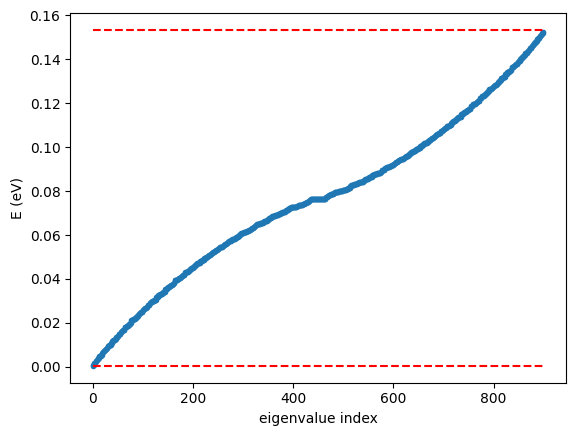

In [16]:
# Bigger one
# proof że układ większy tym bliżej niebieskie do czerwonego
N_help = 30
Layout = initialize_layout(N_help, N_help)
Hamiltonian = initialize_hamiltonian(Layout, t, False)
diagonalizated_hamiltonain = diagonalize_hamiltonian(Hamiltonian)
plt.plot(diagonalizated_hamiltonain, '.')
bottom = np.amin(diagonalizated_hamiltonain)
plt.hlines(8*t+bottom, 0, len(diagonalizated_hamiltonain), colors="red", linestyles="--")
plt.hlines(bottom, 0, len(diagonalizated_hamiltonain), colors="red", linestyles="--")
plt.xlabel("eigenvalue index")
plt.ylabel("E (eV)")
plt.show()

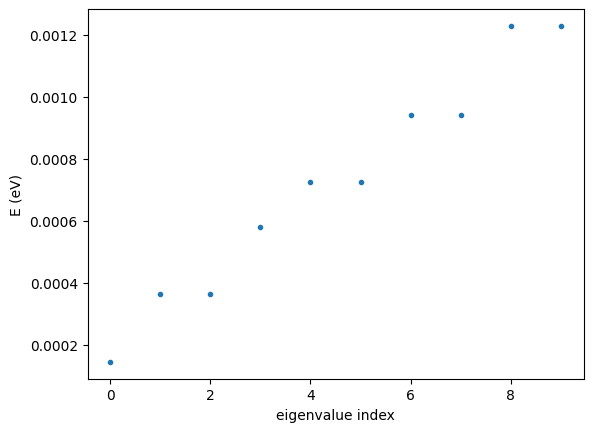

In [16]:
plt.plot(diagonalizated_hamiltonain[:10], '.')
bottom = np.amin(diagonalizated_hamiltonain)
plt.xlabel("eigenvalue index")
plt.ylabel("E (eV)")
plt.show()

In [18]:
print(diagonalizated_hamiltonain[0])
print(diagonalizated_hamiltonain[1]-diagonalizated_hamiltonain[0])

0.0001451296597240694
0.00021741922633106164


### V(x,y)

In [20]:
r_0 = 20 #[nm]
V_max = 0.3 #[eV]
a = 1
N_help = 30

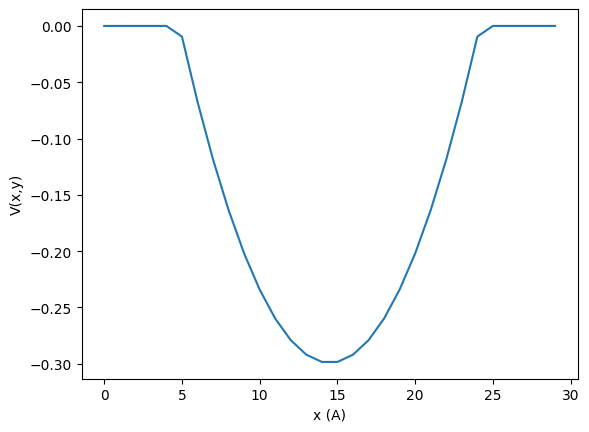

<Figure size 640x480 with 0 Axes>

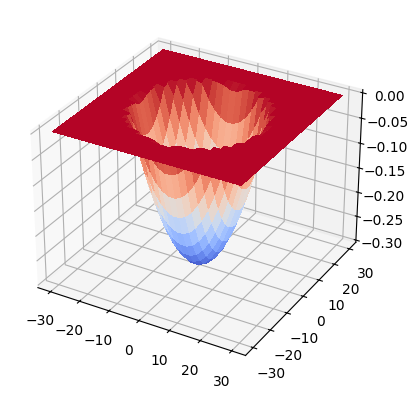

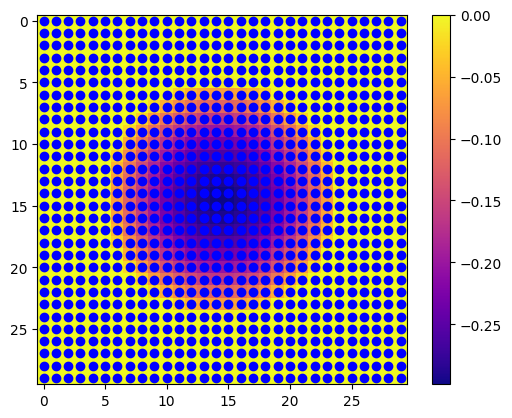

In [24]:
def V_n_direct(dist_sqr):
    dist_sqr = abs(dist_sqr)
    if np.sqrt(dist_sqr) >= r_0:
        return 0
    else:
        return V_max/(r_0*r_0) * dist_sqr - V_max

def V_n(dist_sqr):
    a_help = np.zeros_like(dist_sqr)
    for i in range(len(dist_sqr)):
        a_help[i] = V_n_direct(dist_sqr[i])
    return a_help

Layout = initialize_layout(N_help, N_help)
x = np.linspace(-N_help*a,N_help*a,N_help)
y = np.linspace(-N_help*a,N_help*a,N_help) 
xx, yy = np.meshgrid(x, y)

R = ((a*xx)**2 + (a*yy)**2)

f = lambda R: V_n(R)
Potencial = np.array(list(map(f, R)))

#  show middle Potencial
plt.plot(Potencial[math.floor(len(Potencial)/2)])
plt.ylabel("V(x,y)")
plt.xlabel("x (A)")
plt.show()
plt.clf()

# show all Potencial
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, Potencial, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()
plt.clf()

for elem in Layout["realLocation"]:
    plt.scatter(elem[1][0], elem[1][1], c='blue', linewidths=1)
plt.gca().set_aspect('equal', 'box')
plt.imshow(Potencial, cmap=cm.plasma)
plt.colorbar()
plt.show()


### Hamiltonian with the potencial

In [ ]:
def initialize_hamiltonian(Layout, t):
    elements = Layout.shape[0]*Layout.shape[1]
    layout_size_x = Layout.shape[0]
    layout_size_y = Layout.shape[1]
    Hamiltonian = np.zeros((elements,elements))

    for i in range(layout_size_x):
        for j in range(layout_size_y):
            elem = Layout[i,j] - 1
            
            next_x, prev_x, next_y, prev_y = neighbours(Layout, i, j, PBC)

            Hamiltonian[next_x,elem] = -t
            Hamiltonian[prev_x,elem] = -t
            Hamiltonian[next_y,elem] = -t
            Hamiltonian[prev_y,elem] = -t
            # symetria
            Hamiltonian[elem,next_x] = -t
            Hamiltonian[elem,prev_x] = -t
            Hamiltonian[elem,next_y] = -t
            Hamiltonian[elem,prev_y] = -t

    for i in range(elements):
       
       Hamiltonian[i][i] = 4*t + V(i, layout_size_x, Layout, a)
       
    return Hamiltonian

def V(i, layout_size_x, Layout, a):
    dist_sqr = distance_sqr_from_center(i+1, layout_size_x, Layout, a)
    return V_n_direct(dist_sqr)

def V_n_direct(dist_sqr):
    dist_sqr = abs(dist_sqr)
    if np.sqrt(dist_sqr) >= r_0:
        return 0
    else:
        return V_max/(r_0*r_0) * dist_sqr - V_max

def distance_sqr_from_center(elem1, size_dim, Layout, a):
    center = (size_dim-1)/2
    x1, y1 = find_coordinates(elem1, Layout)
    return (a*(x1 - center))**2 + (a*(y1 - center))**2

def find_coordinates(elem, Layout):
    layout_size_x = Layout.shape[0]
    layout_size_y = Layout.shape[1]

    for i in range(layout_size_x):
        for j in range(layout_size_y):
            if Layout[i,j] == elem:
                return i, j
    return -1, -1

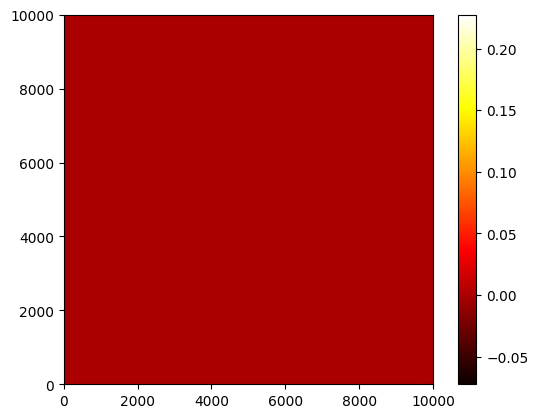

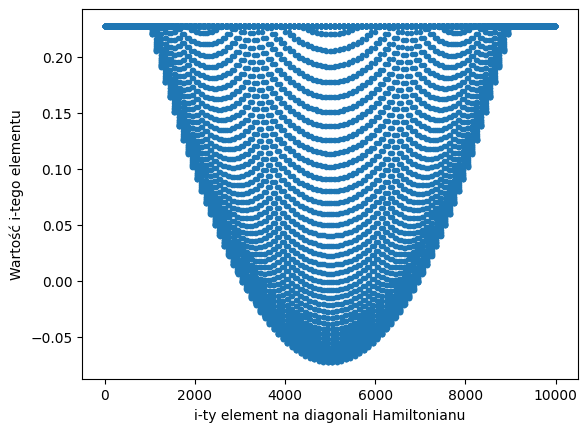

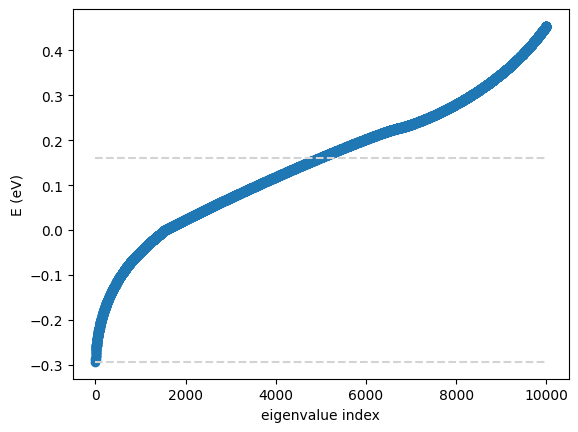

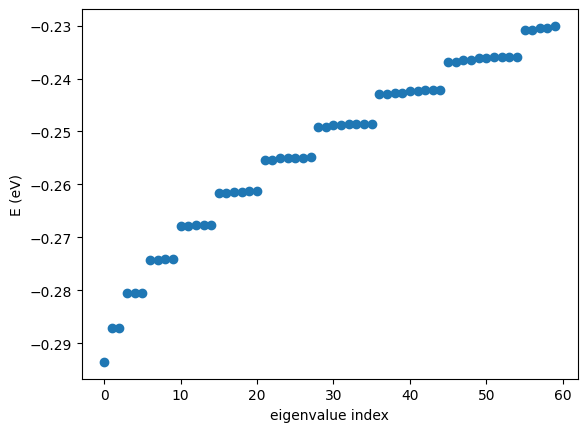

In [ ]:
r_0 = 40
V_max = 0.3
n = 100
# show hamiltonian
Layout = initialize_layout(n, n)
Hamiltonian = initialize_hamiltonian(Layout, t)

ran = math.floor(math.sqrt(Hamiltonian.size))
plt.imshow(Hamiltonian, cmap='hot', extent=[0, ran, 0, ran])
plt.colorbar() 
plt.show()

aaa = np.zeros(ran)
for i in range(ran):
    aaa[i] = Hamiltonian[i][i]
plt.clf()
plt.plot(aaa, ".")
plt.xlabel("i-ty element na diagonali Hamiltonianu")
plt.ylabel("Wartość i-tego elementu")
plt.show()

diagonalizated_hamiltonain = diagonalize_hamiltonian(Hamiltonian)

plt.plot(diagonalizated_hamiltonain, 'o')
bottom = np.amin(diagonalizated_hamiltonain)
plt.hlines(8*t+bottom, 0, len(diagonalizated_hamiltonain), colors="lightgray", linestyles="--")
plt.hlines(bottom, 0, len(diagonalizated_hamiltonain), colors="lightgray", linestyles="--")
plt.xlabel("eigenvalue index")
plt.ylabel("E (eV)")
plt.show()

plt.plot(diagonalizated_hamiltonain[:60], 'o')
plt.xlabel("eigenvalue index")
plt.ylabel("E (eV)")
plt.show()


In [ ]:
def omega_calc(V, r):
    return np.sqrt((2*V*_1eV)/(r*10e-10)**2)

omega = omega_calc(V_max, r_0)
calculation = diagonalizated_hamiltonain[1]-diagonalizated_hamiltonain[0]
print(omega, calculation, omega - calculation, abs(omega - calculation)/omega*100, a, _1eV, V_max, r_0)

0.007751233693741919 0.006483406318969376 0.0012678273747725429 16.35645917624885 1 1.602176634e-19 0.3 40
